# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

We want to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Both datasets include data to answer these questions, but they are not indetically coded and need to be cleaned in order to be compared.

## Reading in the data, loading the libraries and initial data exploration

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.info())
print('\n')
print(dete_survey.head())
print('\n')
print(dete_survey.isnull().sum())
print('\n')
print(dete_survey['Classification'].value_counts())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

For the `dete_survey` we observe that in total there are 822 observations, but a number of columns seem to have many missing values. We can identify variables like `Classification`, `Business Unit` and identifaction variables like `Aboriginal`or `Torres Strait`to have many (sometimes as many as 819 out of 822 cases) being missing. While the first two variables might represent cases where the respondents potentially were not willinign to give the respective information, or the information was not recorded for other reasons, the identification variables are probably counted as missing because they represent instances where a certain characteristic (i.e. being Aboriginal) is not given. They might be coded as 0/1 instead of missing. There are a number of other variables with missings, but a much smaller number. We might be able to drop those cases. Let's look at the `tafe_survey`.

In [2]:
print(tafe_survey.info())
print('\n')
print(tafe_survey.head())
print('\n')
print(tafe_survey.isnull().sum())
print('\n')
#print(tafe_survey['Classification'].value_counts())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In the `tafe_survey` the question format, which was multiple choice for many questions, is contrubiting a lot to the count of missing values. Any time a tickbox was not ticked, we find a missing recorded. There are consistently missing values for 106 cases on age, emplyoment type and classification (and somem more variables). These migth baybe be empty rows? Potentially it could be worthwhile to explore these cases more. 

Overall it looks as if our main variables of interest do not containg too many missing values.

Additionally, we can infer that

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. We'll use the `pd.read_csv()` function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.


In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


## Cleaning column names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. We will rename the remaining columns in `dete_survey_updated` according to the following criteria:

* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').

In [4]:
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [5]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('/', '_').str.strip().str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


We will also update the columns names in the `tafe_survey_updated` dataframe by renaming column names manually.

In [6]:
mapping_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(mapper=mapping_dict, axis=1, inplace=True)

print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


The rest of the columns will be dealt with in a later step.

## Removing data that we don't need

The research question is: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [7]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [8]:
# Create a boolean mask for dete_survey_update, only selecting resignations
dete_resignations_mask = dete_survey_updated['separationtype'].str.contains(r"Resignation", na=False)

# Use the mask to filter the dataframe
dete_resignations = dete_survey_updated.loc[dete_resignations_mask]

# Create a boolean mask for tafe_survey_update, only selecting resignations
tafe_resignations_mask = tafe_survey_updated['separationtype'].str.contains(r"Resignation", na=False)

# Use the mask to filter the dataframe
tafe_resignations = tafe_survey_updated.loc[tafe_resignations_mask]

## Verify the data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. 


* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

We start by cleaning the cease and start date colums in both datasets.

In [9]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64


In [10]:
pattern = r"([1-2][0-9]{3})"
dete_years = dete_resignations['cease_date'].str.extract(pattern).astype(float)
print(dete_years)

          0
3    2012.0
5    2012.0
8    2012.0
9    2012.0
11   2012.0
..      ...
808  2013.0
815  2014.0
816  2014.0
819  2014.0
821  2013.0

[311 rows x 1 columns]


In [11]:
dete_resignations['cease_date'] = dete_years

<ipython-input-11-a6df3e196234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date'] = dete_years


In [12]:
print(dete_resignations['cease_date'])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64


In [13]:
print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [14]:
print(dete_resignations['dete_start_date'].value_counts())

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


For the `dete_resignations` we can cofirm that there are no start dates later than the cease dates. We also do not have start dates going back as far as 1940. The earliest start date is 1963. What's the situation in the `tafe_resignations`data?

In [15]:
print(tafe_resignations['cease_date'].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


Both series look plausible to me. We have a broad range of `defe` start dates and only a small range of resignation dates (2006-2013). Likewise in `tafe` the range of resignation dates is only a range between 2009-2011. Generally, that seems to point towards fairly long tenures. But we might look at that in the next step.

## Create a length of service variable in `dete`

We only have to create this column in the `dete`dataset, since a comparable column called `institute_service` already exists in `tafe`.

In [16]:
dete_resignations = dete_resignations.copy()
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Let's quickly get some summary statistics.

In [17]:
print(dete_resignations['institute_service'].describe())

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64


In [18]:
print(tafe_resignations['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


A rought first comparison of the distributions of `institute_service` in both dataframes seems to hint at slightly shorter tenure at `defe` in comparison to `tafe`. But we need to look at this more rigorously.

## Identifying dissatisfied employees in the data

Next, we'll identify any employees who resigned because they were dissatisfied. We have the following information at our disposal:

1. `tafe_survey_updated`:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`
2. `dete_survey_updated`:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.
We start by converting the `tafe`dissatisfaction indicators into boolean values.

In [19]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [20]:
import numpy as np

# define a mapping dictionary
#tafe_mapper = {'-': False, 'Contributing Factors. Dissatisfaction': True, np.nan: np.nan}

# apply to dissatisfaction variables
#tafe_resignations.loc[:, 'Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].map(tafe_mapper)
#tafe_resignations.loc[:, 'Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].map(tafe_mapper)

If any of the columns listed above contain a `True` value, we'll add a `True` value to a new column named `dissatisfied`. What we did in the previous step with a mapping dictionary can actually be more efficiently achieved by a function.

In [21]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

In [22]:
# apply to all relevant columns
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

<ipython-input-22-04b6f5546664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

We are now ready to combine both datasets.

In [24]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [25]:
# drop columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

We combined both dataframes and only retain columns with at least 500 non-missing values.

## Clean the service column

In [26]:
print(combined_updated['institute_service'].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


Cleaning this column is a challenge because we have interval coded and binned data at the same time. We will convert all values to categories, according to the following definitions:


* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [27]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [28]:
# "Less than 1 year" and "More than 20 years" will be converted by hand
# "Less than 1 year" --> 0; "More than 20 years" --> 20

combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('Less than 1 year', '0').str.replace('More than 20 years', '20')

In [29]:
print(combined_updated['institute_service'].value_counts(dropna=False))

nan      88
0        73
1-2      64
3-4      63
5-6      33
11-20    26
5.0      23
1.0      22
7-10     21
0.0      20
3.0      20
6.0      17
4.0      16
9.0      14
2.0      14
7.0      13
20       10
8.0       8
13.0      8
15.0      7
20.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
11.0      4
19.0      3
32.0      3
39.0      3
21.0      3
36.0      2
30.0      2
28.0      2
25.0      2
26.0      2
49.0      1
29.0      1
33.0      1
31.0      1
34.0      1
38.0      1
27.0      1
35.0      1
42.0      1
41.0      1
Name: institute_service, dtype: int64


In [30]:
# mask for those containing a decimal point '.'
decimal= combined_updated['institute_service'].str.contains('.', na=False)

# split only those with decimal points and keep the first entry
combined_updated.loc[decimal, 'institute_service'] = combined_updated.loc[decimal, 'institute_service'].str.split('.').str[0]

print(combined_updated['institute_service'].value_counts(dropna=False))

0        93
nan      88
1-2      64
3-4      63
5-6      33
11-20    26
5        23
1        22
7-10     21
3        20
6        17
20       17
4        16
2        14
9        14
7        13
8         8
13        8
15        7
22        6
17        6
10        6
14        6
12        6
18        5
16        5
11        4
23        4
24        4
21        3
32        3
39        3
19        3
30        2
28        2
36        2
25        2
26        2
38        1
27        1
35        1
49        1
41        1
31        1
42        1
33        1
34        1
29        1
Name: institute_service, dtype: int64


In [31]:
# create a mask for the hyphenated entries
hyphen= combined_updated['institute_service'].str.contains('-', na=False)

# Assign the mean value of the categorical entries; i.e. 1.5 for "1-2"
combined_updated.loc[hyphen, 'institute_service'] = (
    combined_updated.loc[hyphen, 'institute_service'].str.split('-').str[0].astype(float) +
    combined_updated.loc[hyphen, 'institute_service'].str.split('-').str[1].astype(float)
) / 2

# convert "nan" to NaN
combined_updated['institute_service'] = combined_updated['institute_service'].replace('nan', np.nan)

#convert complete column to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

print(combined_updated['institute_service'].value_counts(dropna=False))

0.0     93
NaN     88
1.5     64
3.5     63
5.5     33
15.5    26
5.0     23
1.0     22
8.5     21
3.0     20
20.0    17
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
15.0     7
10.0     6
12.0     6
17.0     6
22.0     6
14.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
19.0     3
21.0     3
39.0     3
32.0     3
26.0     2
30.0     2
36.0     2
28.0     2
25.0     2
29.0     1
42.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64


Now we can recode everything into the categories mentioned above.

In [32]:
# define a function to recode the numerical values into categories
def recode_service(val):
    if pd.isnull(val):
        return np.nan
    elif (val >= 0) & (val < 3):
        return "New: Less than 3 years at a company"
    elif (val >= 3) & (val <=6):
        return "Experienced: 3-6 years at a company"
    elif (val >= 7) & (val <= 10):
        return "Established: 7-10 years at a company"
    elif (val > 10):
        return "Veteran: 11 or more years at a company"

# apply the function to the institute_service column
combined_updated['service_cat'] = combined_updated['institute_service'].apply(recode_service)

print(combined_updated['service_cat'].value_counts(dropna=False))

New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
NaN                                        88
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64


In [33]:
print(combined_updated['service_cat'].value_counts(dropna=False, normalize = True))

New: Less than 3 years at a company       0.296467
Experienced: 3-6 years at a company       0.264209
Veteran: 11 or more years at a company    0.208909
NaN                                       0.135177
Established: 7-10 years at a company      0.095238
Name: service_cat, dtype: float64


After successfully recoding all the information in the `institute_service`column, we can print the recoded categories. The results show that among resignees, ca. 30 % are new employees (less than 3 years of service). A bit more than a quarter (26 %) are experienced employees with 3-6 years of service. Around 10 % are established employees (7-10 years of service), and the remaining 21 % areveteran employees with 11 or more years at the company. 14 % of the data here is missing.

## An initial analysis

WWe are finally at a stage where we can analyze the dissatisfaction data together with the years of service data for the employees. We will fill in the missing values in the `dissatisfied`column first. For this, we will replace the missings with the values occuring most frequently in this column. After that, we will plot the results.

In [34]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


Based on this statistic, we fill the missing values with `False`.

In [36]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value=False)
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


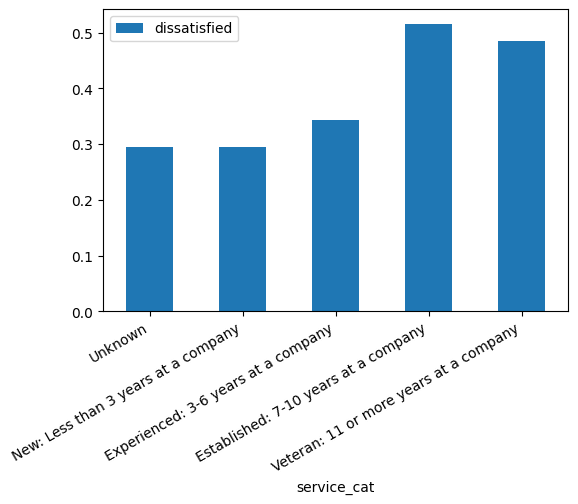

In [51]:
# make a pivot table and a plot
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Fill NaNs in service_cat with the label "Unknown"
combined_updated['service_cat'] = combined_updated['service_cat'].fillna('Unknown')

# Define the custom order for the categories in service_cat
category_order = [
    'Unknown',
    'New: Less than 3 years at a company',
    'Experienced: 3-6 years at a company',
    'Established: 7-10 years at a company',
    'Veteran: 11 or more years at a company'
]

# Convert the 'service_cat' column to a categorical type with the custom order
combined_updated['service_cat'] = pd.Categorical(combined_updated['service_cat'], categories=category_order, ordered=True)

# make a pivot table
pv_dissat = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc='mean')

# Sort the pivot table by the custom order
pv_dissat = pv_dissat.reindex(category_order)

# Plot the bar chart
ax = pv_dissat.plot(kind='bar', rot=30)

# Ensure all labels are displayed correctly
ax.set_xticklabels(category_order)
ax.set_xticklabels(category_order, rotation=30, ha='right')

plt.show()

Looking at our plot, we can make a number of interesting observations. First of all, the respondents in the "Unknown" category of service at the institiute has a similar satisfaction level than the employees with less than 3 years of experience. While we cannot know for sure, it's not implausible that the unknowns are actually also new employees. We then see that dissatisfaction levels among resignees roughly increase with tenure at the institute. Experienced emplyees report dissatisfaction to 35 %, the established employees to 50 %, and the veteran employees also around 48 %. The dissatisfaction among the established and veteran employees might be related to changes in management or the way that the institute operates. They potentially have a harder time to adapt, which leads to dissatisfaction and eventually their resignment.
But the level of dissatisfaction among the new joiners is also fairly considerable (with 30%). In this group, we might hypothesise that they could have had different expectations when they signed up for the job, and these expectations were just not fulfilled, making them leave within the first 3 years.

## Conclusion

We analysed dissatisfaction levels among employees of DETE and TAFE, conditional upon their years of working at the institute. Our findings show that new as well as established employees that have resigned show a fair amount of dissatisfaction. 30 % among new employees who resigned reported dissatisfaction. This could be due to lack of fit between the expectations and the role. Among established and veteran employees, those haveing worked there between 7 and 10 years or even more than 10 years, the dissatisfaction levels reach as high as 50 %. This could be an indication of dissatisfaction in the wake of management changes or changes in the way that the institutes operate, which lead to dissatisfaction and resignation among these employees.